<a href="https://colab.research.google.com/github/wozzin/AI_ML/blob/main/DecisionTree_Regressor_ram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 결정 트리 회귀

- 분류 결정 트리와 비슷
- 각 노드에서 클래스를 예측하는 대신 어떤 값을 예측
- 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없음
 - (다른 모든 트리기반 회귀 모델도 동일)

[DecisionTreeRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

```
DecisionTreeRegressor(criterion, splitter, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, random_state, max_leaf_nodes, min_impurity_decrease, min_impurity_split, presort, ccp_alpha)
```
- criterion : 분할 품질을 측정하는 기능 (default : gini)
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
- <font  color=yellow> max_depth : 트리의 최대 깊이 <br>
(값이 클수록 모델의 복잡도가 올라간다.) </font>
- min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- <font  color=yellow> min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1) </font>
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_features : 각 노드에서 분할에 사용할 특징의 최대 수
- random_state : 난수 seed 설정
- <font  color=yellow> max_leaf_nodes : 리프 노드의 최대수 </font>
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- presort : 데이터 정렬 필요 여부 (버전 0.22부터 사용되지 않음)
- ccp_alpha : 최소 비용 복잡성 가지 치기(Minimal Cost-Complexity Pruning) 복잡성 매개변수, 음이아닌 float (버전 0.22의 새로운 기능)


In [2]:
pip install mglearn

     |████████████████████████████████| 540 kB 15.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=2bb537eda3b57b0812247655a2227b110cf550d68720ff3c59278ccaa90b9a9a
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


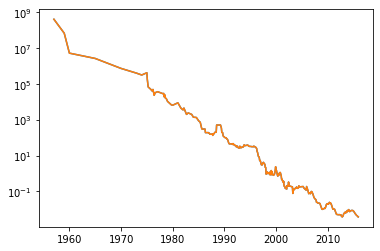

In [6]:
import numpy as np
import pandas as pd
import os
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

# 로그 스케일로 그린 램 가격 동향
# 로그 스케일로 그린 램 가격 동향
type(ram_prices)
ram_prices.head()
plt.plot(ram_prices.date, ram_prices.price)
plt.yscale('log')
# log scale 한번에 그리기
plt.semilogy(ram_prices.date, ram_prices.price)

- y 축은 로그 스케일
- 로그 스케일로 그리면 약간의 굴곡을 제외하고는 선형적으로 나타나서 비교적 예측하기 쉬움

In [10]:
# 결정트리 회귀 적용
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듬
d_train = ram_prices[ram_prices.date < 2000]
d_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용
X_train = d_train.date[:, np.newaxis]

# 데이터와 타깃의 관계를 간단하게 만들기 위해 로그 스케일로 변경.
y_train = np.log(d_train.price)

# 모델 선택 및 학습
model_tree = DecisionTreeRegressor().fit(X_train, y_train)
model_lr = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다.
X_test = ram_prices.date[:, np.newaxis]

pred_tree = model_tree.predict(X_test)
pred_lr = model_lr.predict(X_test)

# 예측한 값의 로그 스케일 되돌림
pred_tree = np.exp(pred_tree)
pred_lr = np.exp(pred_lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


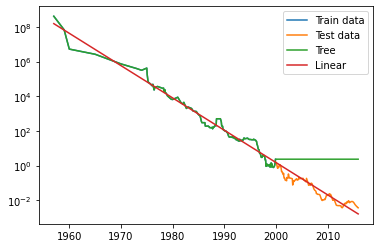

In [13]:
# 결과 시각화
plt.semilogy(d_train.date, d_train.price, label='Train data')
plt.semilogy(d_test.date, d_test.price, label='Test data')

plt.semilogy(ram_prices.date, pred_tree, label='Tree')
plt.semilogy(ram_prices.date, pred_lr, label='Linear')
plt.legend()

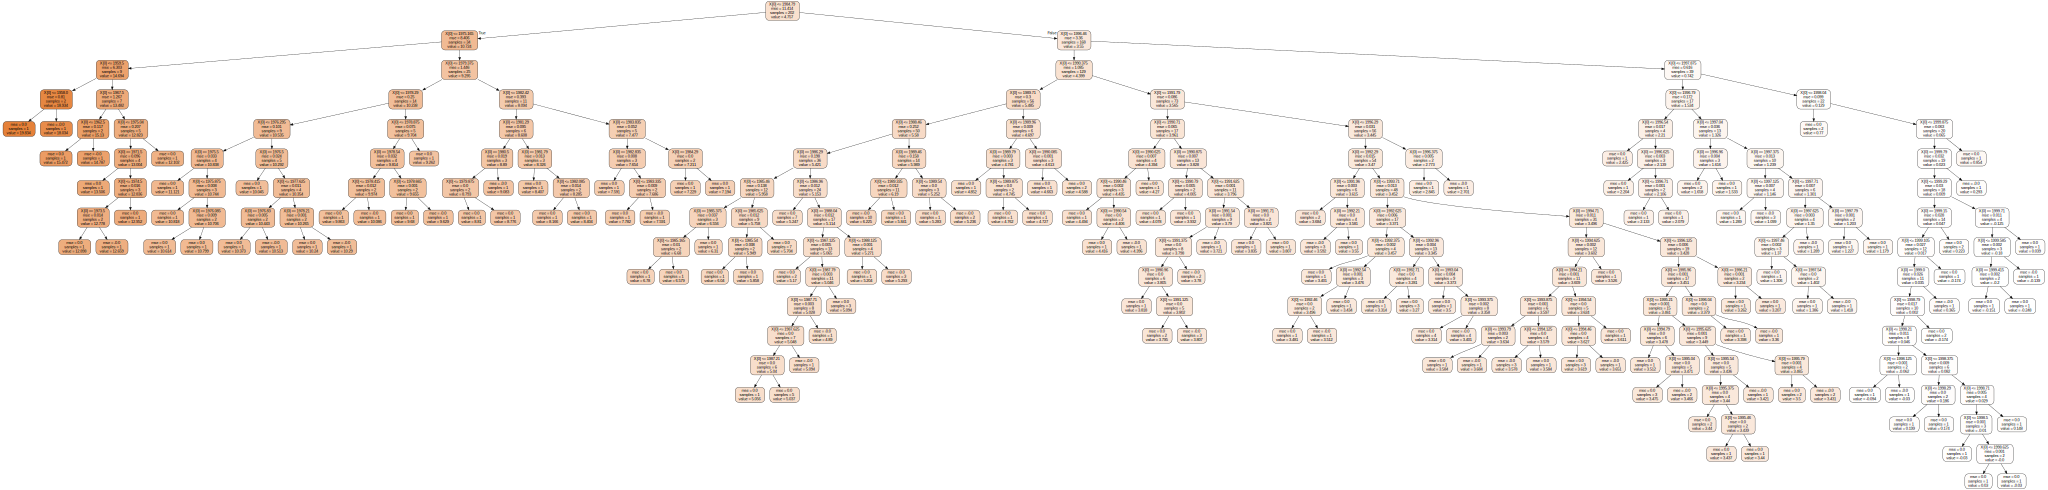

In [15]:
# 결정트리 시각화
from sklearn.tree import export_graphviz
import graphviz

dot_graph = export_graphviz(model_tree, out_file=None,
                filled=True, rounded=True)
display( graphviz.Source(dot_graph) )

- 선형 모델은 우리가 아는 대로 직선으로 데이터를 근사
- 이 직선은 훈련 데이터와 테스트 데이터에 있는 미세한 굴곡을 매끈하게 근사하여 테스트 데이터(2000년 이후)를 꽤 정확히 예측
- 반면에 트리 모델은 훈련 데이터를 완벽하게 예측
- 트리의 복잡도에 제한을 두지 않아서 전체 데이터셋을 모두 기억하기 때문
- 그러나 모델이 가진 데이터 범위 밖으로 나가면 단순히 마지막 포인트를 이용해 예측하는 게 전부
- 트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없음


-  사전 가지치기 방법 중 max_depth, max_leaf_nodes 또는 min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분

- 다른 알고리즘들보다 나은 점 : 만들어진 모델을 쉽게 시각화할 수 있음, 데이터의 스케일에 구애받지 않음 (스케일링이 필요 없음)

- 주요 단점 : 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않음